In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from algorithms.dbscan_clustering import DBSCANClusterer
from algorithms.eps_dbscan_clustering import EpsilonDBSCANClusterer
from algorithms.epsilon_scaling import EpsilonScalingDBSCAN
from algorithms.parallel_dbscan_clustering import ParallelDBSCANClusterer
from algorithms.hdbscan_clustering import HDBSCANClusterer

from sklearn.neighbors import NearestNeighbors
import time
import hdbscan

%matplotlib inline


In [2]:
path = "Data\\"

# Đọc dữ liệu từ file driver-data.csv
df = pd.read_csv(path + 'banknote.csv')
X = df.iloc[:, 1:].values


In [3]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCANClusterer(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

epsilon_dbscan = EpsilonDBSCANClusterer(min_samples=5)
labels_epsilon_dbscan = epsilon_dbscan.fit_predict(X_scaled)

eps_dbscan = EpsilonScalingDBSCAN(min_samples=5, p=2)
labels_epsilon_scaling = eps_dbscan.fit_predict(X_scaled)

parallel_dbscan = ParallelDBSCANClusterer(eps=0.5, min_samples=5, n_jobs=2)
labels_parallel_dbscan = parallel_dbscan.fit_predict(X_scaled)

hdbscan = HDBSCANClusterer(min_cluster_size=5, min_samples=2)
labels_hdbscan = hdbscan.fit_predict(X_scaled)


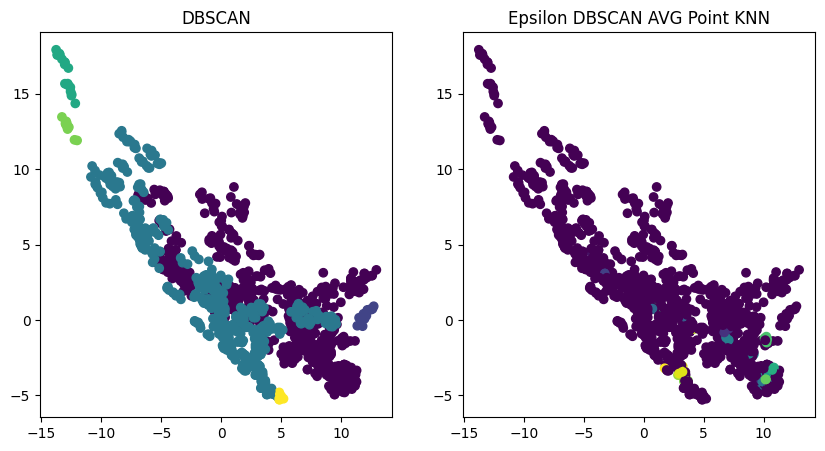

In [4]:
algorithms = ['DBSCAN', 'Epsilon DBSCAN AVG Point KNN']
labels = [labels_dbscan, labels_epsilon_dbscan,]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i, ax in enumerate(axs):
    ax.scatter(X[:,0], X[:,1], c=labels[i], cmap='viridis')
    ax.set_title(algorithms[i])

plt.show()

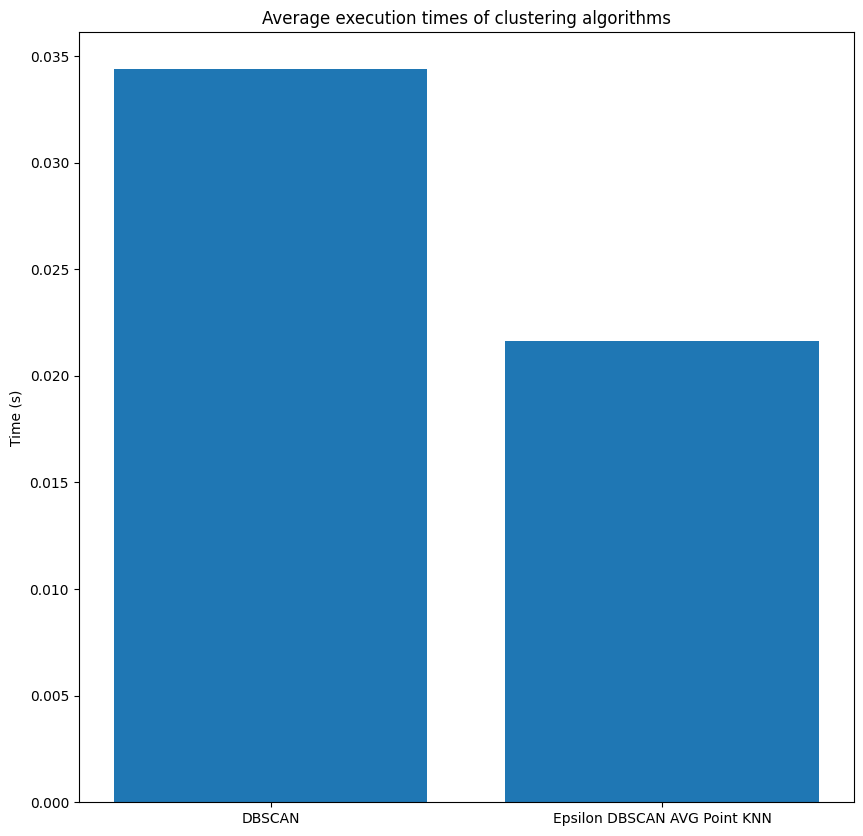

In [5]:
# Áp dụng thuật toán DBSCAN
dbscan_times = []
for i in range(10):
    start = time.time()
    dbscan = DBSCANClusterer(eps=0.5, min_samples=5)
    labels_dbscan = dbscan.fit_predict(X_scaled)
    end = time.time()
    dbscan_times.append(end - start)
dbscan_time_avg = sum(dbscan_times) / len(dbscan_times)

# Áp dụng thuật toán epsilon DBSCAN avg point knn
eps_dbscan_times = []
for i in range(10):
    start = time.time()
    epsilon_dbscan = EpsilonDBSCANClusterer(min_samples=5)
    labels_epsilon_dbscan = epsilon_dbscan.fit_predict(X_scaled)
    end = time.time()
    eps_dbscan_times.append(end - start)
eps_dbscan_time_avg = sum(eps_dbscan_times) / len(eps_dbscan_times)

# Áp dụng thuật toán epsilon DBSCAN caculate each point knn
another_eps_dbscan_times = []
for i in range(10):
    start = time.time()
    eps_dbscan = EpsilonScalingDBSCAN(min_samples=5, p=2)
    labels_epsilon_scaling = eps_dbscan.fit_predict(X_scaled)
    end = time.time()
    another_eps_dbscan_times.append(end - start)
another_eps_dbscan_time_avg = sum(another_eps_dbscan_times) / len(another_eps_dbscan_times)

# Áp dụng thuật toán parallel DBSCAN
parallel_dbscan_times = []
for i in range(10):
    start = time.time()
    parallel_dbscan = ParallelDBSCANClusterer(eps=0.5, min_samples=5, n_jobs=2)
    labels_parallel_dbscan = parallel_dbscan.fit_predict(X_scaled)
    end = time.time()
    parallel_dbscan_times.append(end - start)
parallel_dbscan_time_avg = sum(parallel_dbscan_times) / len(parallel_dbscan_times)

# Áp dụng thuật toán HDBSCAN
hdbscan_times = []
for i in range(10):
    start = time.time()
    hdbscan = HDBSCANClusterer(min_cluster_size=5, min_samples=2)
    labels_hdbscan = hdbscan.fit_predict(X_scaled)
    end = time.time()
    hdbscan_times.append(end - start)
hdbscan_time_avg = sum(hdbscan_times) / len(hdbscan_times)

# Tạo biểu đồ
fig = plt.subplots(figsize=(10, 10))
times = [dbscan_time_avg, eps_dbscan_time_avg]
labels = ['DBSCAN', 'Epsilon DBSCAN AVG Point KNN']
plt.bar(labels, times)
plt.title('Average execution times of clustering algorithms')
plt.ylabel('Time (s)')
plt.show()


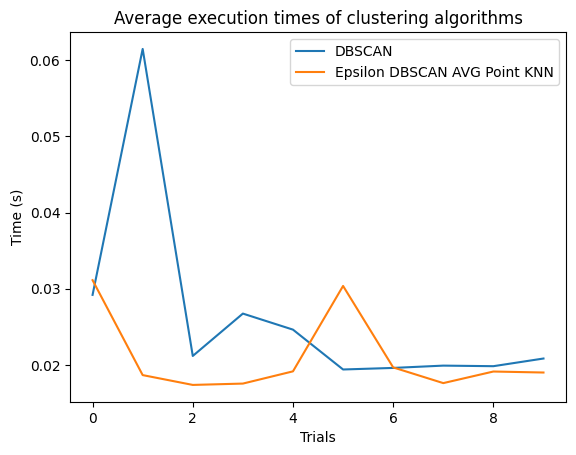

In [10]:
# Đo thời gian chạy của hai thuật toán
dbscan_times = []
eps_dbscan_times = []
n_trials = 10

for i in range(n_trials):
    start = time.time()
    dbscan = DBSCANClusterer(eps=0.5, min_samples=5)
    labels_dbscan = dbscan.fit_predict(X_scaled)
    end = time.time()
    dbscan_times.append(end - start)
    
    start = time.time()
    epsilon_dbscan = EpsilonDBSCANClusterer(min_samples=5)
    labels_epsilon_dbscan = epsilon_dbscan.fit_predict(X_scaled)
    end = time.time()
    eps_dbscan_times.append(end - start)

# Vẽ biểu đồ
plt.plot(range(n_trials), dbscan_times, label="DBSCAN")
plt.plot(range(n_trials), eps_dbscan_times, label="Epsilon DBSCAN AVG Point KNN")
plt.title('Average execution times of clustering algorithms')
plt.xlabel('Trials')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

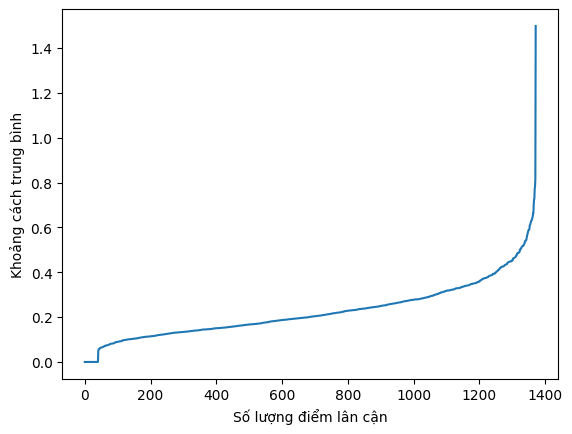

In [7]:
# Tính khoảng cách giữa các điểm
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

# Tính giá trị trung bình của khoảng cách đến các điểm lân cận
avg_distances = np.mean(distances, axis=1)

# Vẽ đường cong giữa giá trị trung bình và số lượng điểm lân cận
plt.plot(np.sort(avg_distances))
plt.xlabel('Số lượng điểm lân cận')
plt.ylabel('Khoảng cách trung bình')
plt.show()
